In [1]:
from main import get_last_data_path
import pickle
from consts import GEMMA_2
from analysis import ComponentAnalyzer
import numpy as np
from typing import List, Tuple

data_dir = "data"

data_path = get_last_data_path(data_dir)
with open(data_path, "rb") as f:
    data = pickle.load(f)

c:\Users\argov\miniconda3\envs\meshuggah\Lib\site-packages\requests\__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(
c:\Users\argov\miniconda3\envs\meshuggah\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
gemma_2_data = data[GEMMA_2]
position = -1

print(len(gemma_2_data.keys()))

30


In [43]:
def sort_by_path_appearance(coefs: np.ndarray, feature_names: List[str]) -> List[Tuple[str, float]]:
    entry_order_indices = np.argmax(np.abs(coefs) > 0, axis=1)

    active_features_mask = np.any(np.abs(coefs) > 0, axis=1)
    active_feature_indices = np.where(active_features_mask)[0]

    # Map the entry order to the active features
    active_entry_order = entry_order_indices[active_feature_indices]

    # Sort the active features by their entry order
    final_sorted_indices = active_feature_indices[np.argsort(active_entry_order)]

    ordered_feature_names = [feature_names[i] for i in final_sorted_indices]

    return ordered_feature_names

In [44]:
import re

def component_to_layer_num(component_name: str) -> int:
    re_pattern = 'blocks\.(\d+)\.*'
    layer_num = re.search(re_pattern, component_name).group(1)
    layer_num = int(layer_num)
    return layer_num


In [ ]:
# from collections import defaultdict
# r2_dict = defaultdict(list)
# diff_in_r2_dict = defaultdict(list)

# k = 4
# num_layers = 21
# mlp_top_k_frequencies = {"positive": [0 for _ in range(num_layers)], "negative": [0 for _ in range(num_layers)]}
# attn_top_k_frequencies = {"positive": [0 for _ in range(num_layers)], "negative": [0 for _ in range(num_layers)]}
# for steering_vector, per_vector_data in gemma_2_data.items():
#     data_at_position = per_vector_data['all']

#     negative_outputs_train, positive_outputs_train, negative_outputs_test, positive_outputs_test = data_at_position
#     negative_dots_train = negative_outputs_train[0]
#     positive_dots_train = positive_outputs_train[0]
#     negative_dots_test = negative_outputs_test[0]
#     positive_dots_test = positive_outputs_test[0]


#     analyzer = ComponentAnalyzer(
#                 model_name=GEMMA_2,
#                 steering_vector=steering_vector,
#                 data=per_vector_data,
#                 multicomponent=False,
#                 results_dir=None,
#                 quiet=True,
#                 save_details=False,
#             )

#     mlp_r2_positive, attn_r2_positive, coefs_mlp_positive, coefs_attn_positive, mlp_names, attn_names = analyzer.predictor.mlp_vs_attn(
#         positive_dots_train,
#         positive_dots_test
#     )

#     diff_in_r2_dict['diff'].append(mlp_r2_positive - attn_r2_positive)
#     diff_in_r2_dict['set'].append('positive')

#     r2_dict['component'].extend(['mlp', 'attn'])
#     r2_dict['r2'].extend([mlp_r2_positive, attn_r2_positive])
#     r2_dict['set'].extend(['positive', 'positive'])

#     mlp_names = [component_to_layer_num(c) for c in mlp_names]
#     attn_names = [component_to_layer_num(c) for c in attn_names]

#     positive_mlp_features = sort_by_path_appearance(coefs_mlp_positive, mlp_names)
#     positive_attn_features = sort_by_path_appearance(coefs_attn_positive, attn_names)

#     for layer_index in range(k):
#         mlp_top_k_frequencies["positive"][positive_mlp_features[layer_index]] += 1
#         attn_top_k_frequencies["positive"][positive_attn_features[layer_index]] += 1

#     mlp_r2_negative, attn_r2_negative, coefs_mlp_negative, coefs_attn_negative, ignore_mlp_names, ignore_attn_names = analyzer.predictor.mlp_vs_attn(
#         negative_dots_train,
#         negative_dots_test
#     )

#     diff_in_r2_dict['diff'].append(attn_r2_negative - mlp_r2_negative)
#     diff_in_r2_dict['set'].append('negative')

#     r2_dict['component'].extend(['mlp', 'attn'])
#     r2_dict['r2'].extend([mlp_r2_negative, attn_r2_negative])
#     r2_dict['set'].extend(['negative', 'negative'])

#     negative_mlp_features = sort_by_path_appearance(coefs_mlp_negative, mlp_names)
#     negative_attn_features = sort_by_path_appearance(coefs_attn_negative, attn_names)

#     for layer_index in range(k):
#         mlp_top_k_frequencies["negative"][negative_mlp_features[layer_index]] += 1
#         attn_top_k_frequencies["negative"][negative_attn_features[layer_index]] += 1
    


In [51]:
from collections import defaultdict
r2_dict = defaultdict(list)
diff_in_r2_dict = defaultdict(list)

k = 7
num_layers = 21
positive_top_k_frequencies = {"MLP": [0 for _ in range(num_layers)], "ATTN": [0 for _ in range(num_layers)]}
negative_top_k_frequencies = {"MLP": [0 for _ in range(num_layers)], "ATTN": [0 for _ in range(num_layers)]}
for steering_vector, per_vector_data in gemma_2_data.items():
    data_at_position = per_vector_data['all']

    negative_outputs_train, positive_outputs_train, negative_outputs_test, positive_outputs_test = data_at_position
    negative_dots_train = negative_outputs_train[0]
    positive_dots_train = positive_outputs_train[0]
    negative_dots_test = negative_outputs_test[0]
    positive_dots_test = positive_outputs_test[0]

    analyzer = ComponentAnalyzer(
                model_name=GEMMA_2,
                steering_vector=steering_vector,
                data=per_vector_data,
                multicomponent=False,
                results_dir=None,
                quiet=True,
                save_details=False,
            )

    r2_positive, coefs_positive, alphas_positive, feature_names_positive = analyzer.predictor.ranking_components(
        positive_dots_train,
        positive_dots_test
    )

    positive_features = sort_by_path_appearance(coefs_positive, feature_names_positive)

    for layer_index in range(k):
        feature_name = positive_features[layer_index]
        if 'mlp' in feature_name or 'ln2' in feature_name:
            positive_top_k_frequencies["MLP"][component_to_layer_num(feature_name)] += 1
        elif 'attn' in feature_name or 'ln1' in feature_name:
            positive_top_k_frequencies["ATTN"][component_to_layer_num(feature_name)] += 1

    r2_negative, coefs_negative, alphas_negative, feature_names_negative = analyzer.predictor.ranking_components(
        negative_dots_train,
        negative_dots_test
    )

    negative_features = sort_by_path_appearance(coefs_negative, feature_names_negative)

    for layer_index in range(k):
        feature_name = negative_features[layer_index]
        if 'mlp' in feature_name or 'ln2' in feature_name:
            negative_top_k_frequencies["MLP"][component_to_layer_num(feature_name)] += 1
        elif 'attn' in feature_name or 'ln1' in feature_name:
            negative_top_k_frequencies["ATTN"][component_to_layer_num(feature_name)] += 1

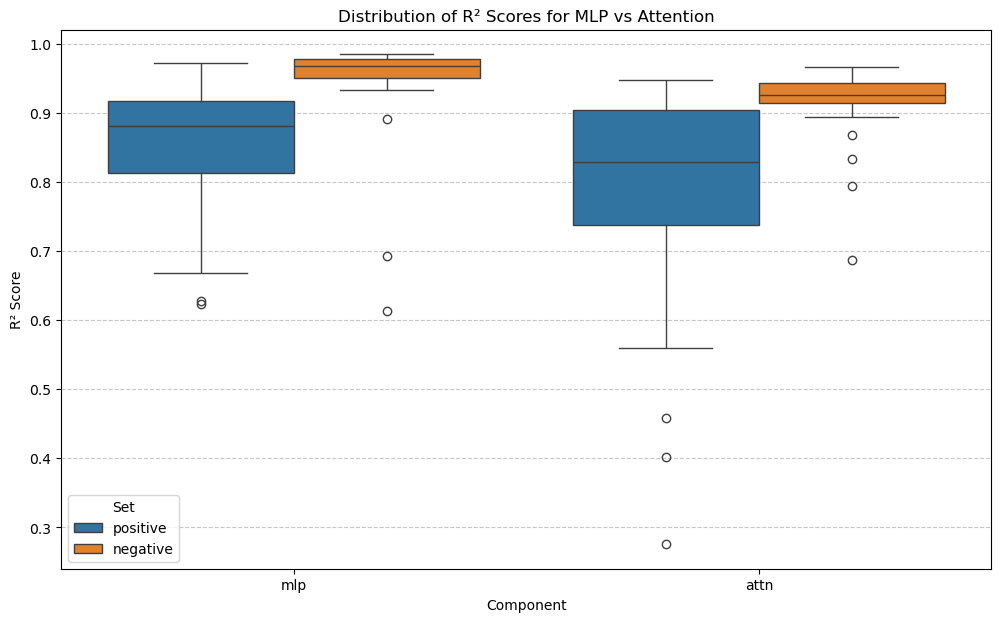

In [ ]:
r2_df = pd.DataFrame(r2_dict)

plt.figure(figsize=(12, 7))
sns.boxplot(
    data=r2_df,
    x='component',
    y='r2',
    hue='set',
)

plt.title('Distribution of R² Scores for MLP vs Attention')
plt.xlabel('Component')
plt.ylabel('R² Score')
plt.legend(title='Set')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.savefig('r2_distribution.png')
plt.show()

In [36]:
sum(positive_top_k_frequencies['MLP']), sum(positive_top_k_frequencies['ATTN'])

(6, 24)

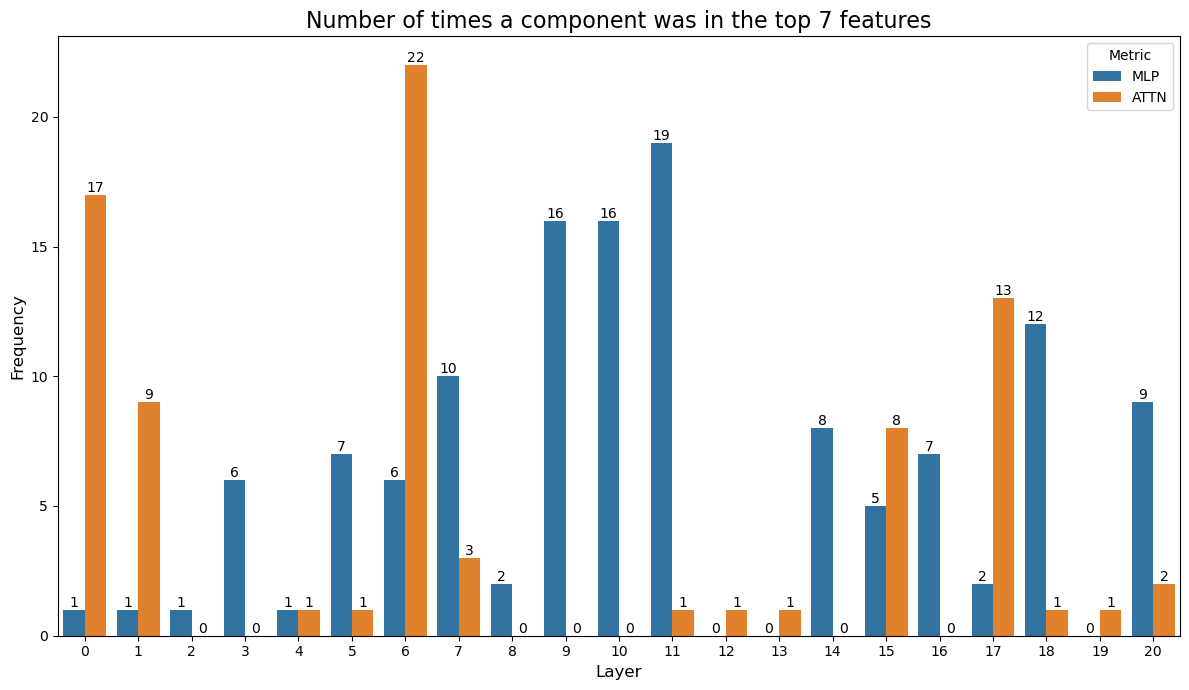

In [52]:
positive_top_k_frequencies_df = pd.DataFrame(positive_top_k_frequencies)

df_long = positive_top_k_frequencies_df.reset_index().melt(
    id_vars=['index'],
    var_name='Metric',
    value_name='Value'
)

plt.figure(figsize=(12, 7))
barplot = sns.barplot(x='index', y='Value', hue='Metric', data=df_long)

plt.title(f'Number of times a component was in the top {k} features', fontsize=16)
plt.xlabel('Layer', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

for container in barplot.containers:
    barplot.bar_label(container)

plt.tight_layout()
plt.savefig(f'positive_top_{k}_frequencies.pdf')
plt.show()


In [38]:
sum(negative_top_k_frequencies['MLP']), sum(negative_top_k_frequencies['ATTN'])

(12, 18)

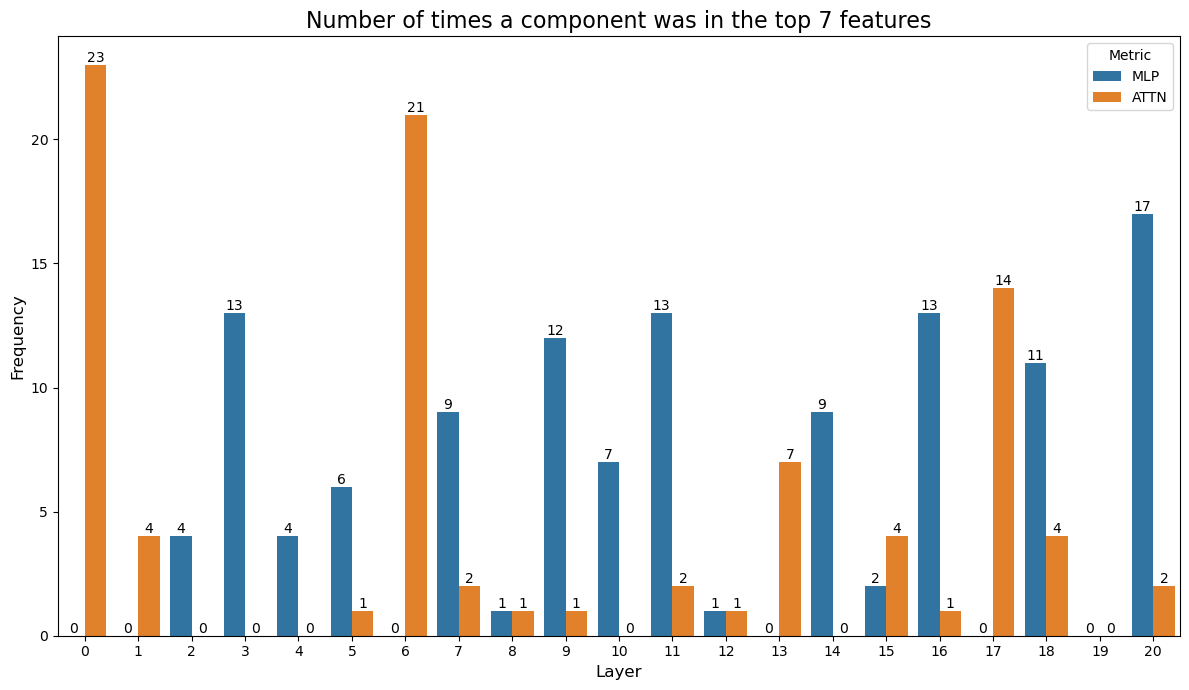

In [53]:
negative_top_k_frequencies_df = pd.DataFrame(negative_top_k_frequencies)

df_long = negative_top_k_frequencies_df.reset_index().melt(
    id_vars=['index'],
    var_name='Metric',
    value_name='Value'
)

plt.figure(figsize=(12, 7))
barplot = sns.barplot(x='index', y='Value', hue='Metric', data=df_long)

plt.title(f'Number of times a component was in the top {k} features', fontsize=16)
plt.xlabel('Layer', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

for container in barplot.containers:
    barplot.bar_label(container)

plt.tight_layout()
plt.savefig(f'negative_top_{k}_frequencies.pdf')
plt.show()


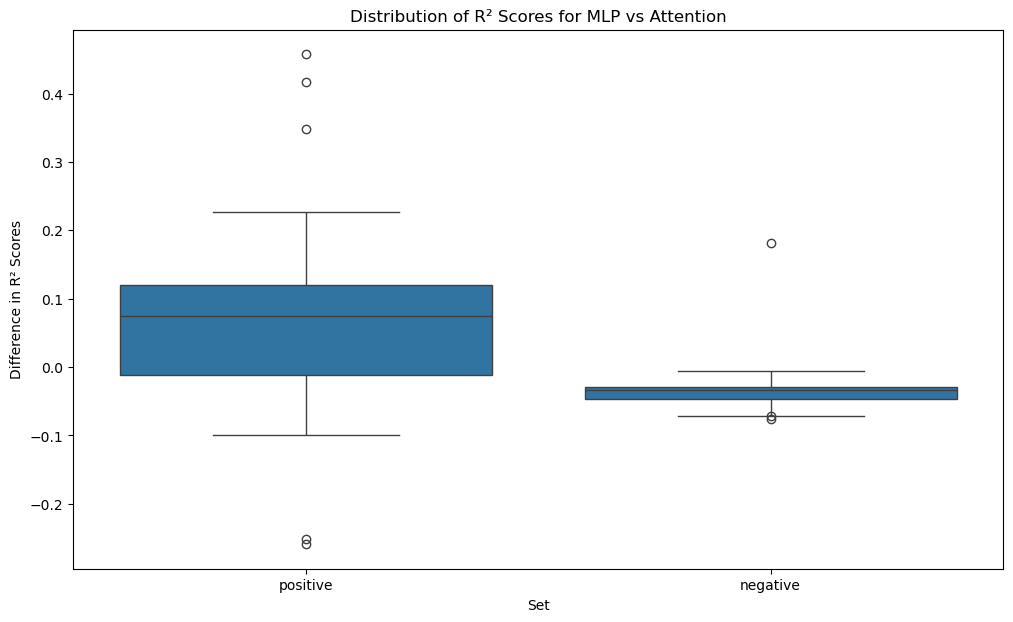

In [22]:
diff_in_r2_df = pd.DataFrame(diff_in_r2_dict)

plt.figure(figsize=(12, 7))
sns.boxplot(
    data=diff_in_r2_df,
    x='set',
    y='diff',
)

plt.title('Distribution of R² Scores for MLP vs Attention')
plt.xlabel('Set')
plt.ylabel('Difference in R² Scores')
plt.savefig('diff_in_r2_distribution.png')
plt.show()

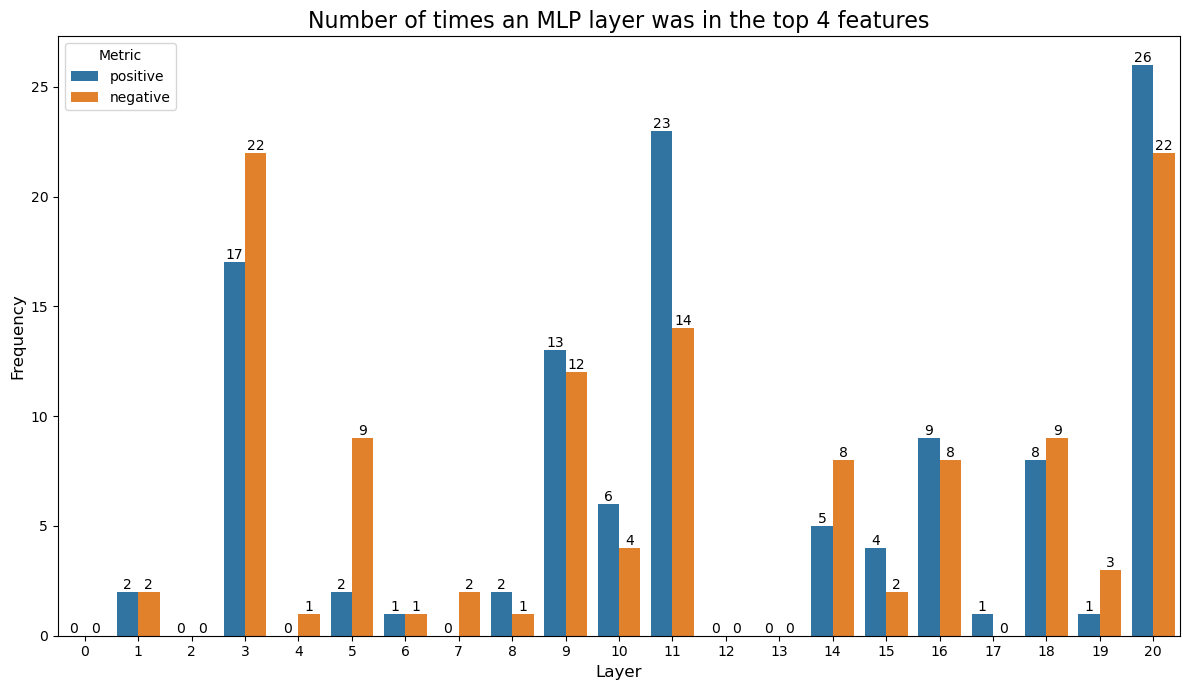

In [23]:
mlp_top_k_frequencies_df = pd.DataFrame(mlp_top_k_frequencies)


df_long = mlp_top_k_frequencies_df.reset_index().melt(
    id_vars=['index'],
    var_name='Metric',
    value_name='Value'
)

plt.figure(figsize=(12, 7))
barplot = sns.barplot(x='index', y='Value', hue='Metric', data=df_long)

plt.title(f'Number of times an MLP layer was in the top {k} features', fontsize=16)
plt.xlabel('Layer', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

for container in barplot.containers:
    barplot.bar_label(container)

plt.tight_layout()
plt.savefig(f'mlp_top_{k}_frequencies.png')
plt.show()


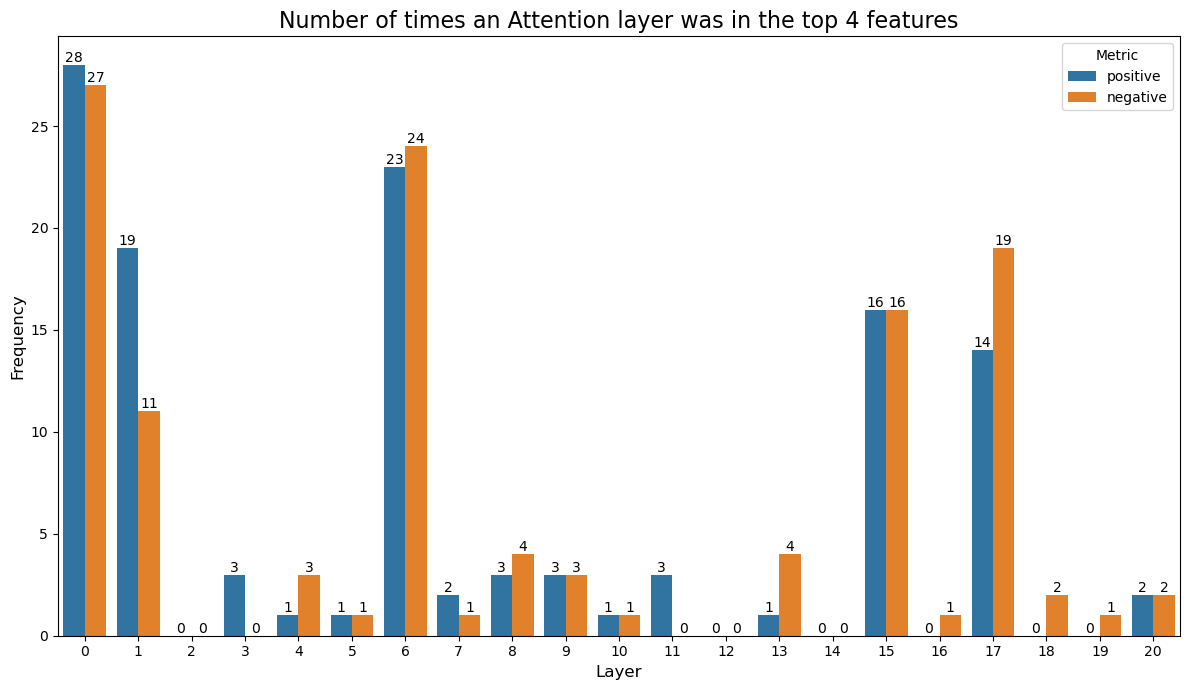

In [24]:
attn_top_k_frequencies_df = pd.DataFrame(attn_top_k_frequencies)


df_long = attn_top_k_frequencies_df.reset_index().melt(
    id_vars=['index'],
    var_name='Metric',
    value_name='Value'
)

plt.figure(figsize=(12, 7))
barplot = sns.barplot(x='index', y='Value', hue='Metric', data=df_long)

plt.title(f'Number of times an Attention layer was in the top {k} features', fontsize=16)
plt.xlabel('Layer', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

for container in barplot.containers:
    barplot.bar_label(container)

plt.tight_layout()
plt.savefig(f'attn_top_{k}_frequencies.png')
plt.show()